<a href="https://colab.research.google.com/github/SofiaIPalladino/AI/blob/main/RedesFeedForward/EMNIST_Definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Con sparse_categorical_crossentropy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 27s 78ms/step - accuracy: 0.2358 - loss: 4.9417 - val_accuracy: 0.6721 - val_loss: 2.8867 - learning_rate: 5.0000e-04
Epoch 2/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step - accuracy: 0.5974 - loss: 3.0165 - val_accuracy: 0.7854 - val_loss: 2.1864 - learning_rate: 5.0000e-04
Epoch 3/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.7025 - loss: 2.4230 - val_accuracy: 0.8275 - val_loss: 1.8125 - learning_rate: 5.0000e-04
Epoch 4/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 42s 91ms/step - accuracy: 0.7589 - loss: 2.0270 - val_accuracy: 0.8512 - val_loss: 1.5561 - learning_rate: 5.0000e-04
Epoch 5/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.7905 - loss: 1.7328 - val_accuracy: 0.8636 - val_loss: 1.3559 - learning_rate: 5.0000e-04
Epoch 6/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.8106 - loss: 1.5212 - val_accuracy: 0.8708 - val_loss: 1.1987 - learning_rate: 5.0000e-04
Epoch 7/150
278/278 ━━━━━━━━━━━━━━━━━━━━ 39s 7

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


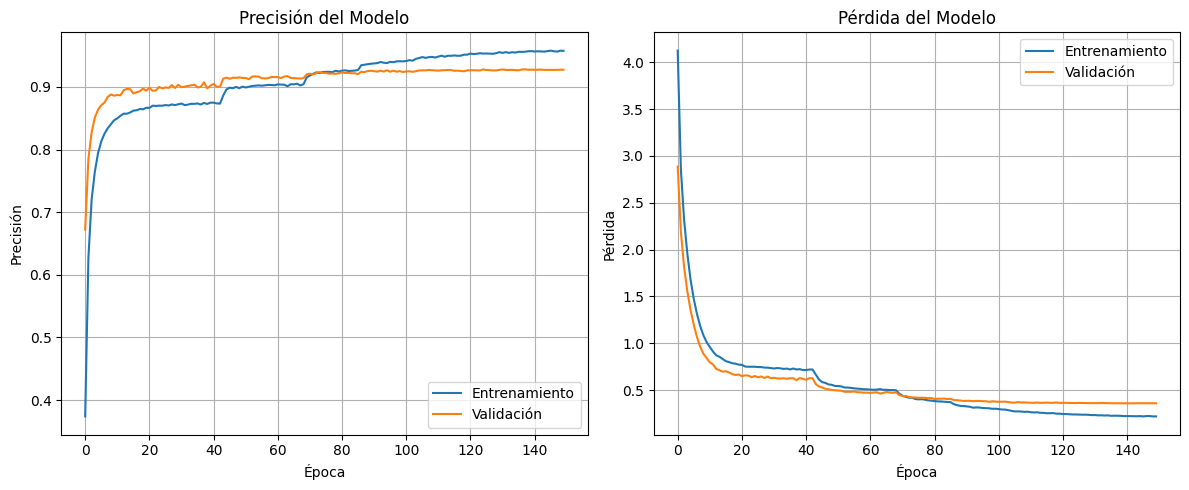

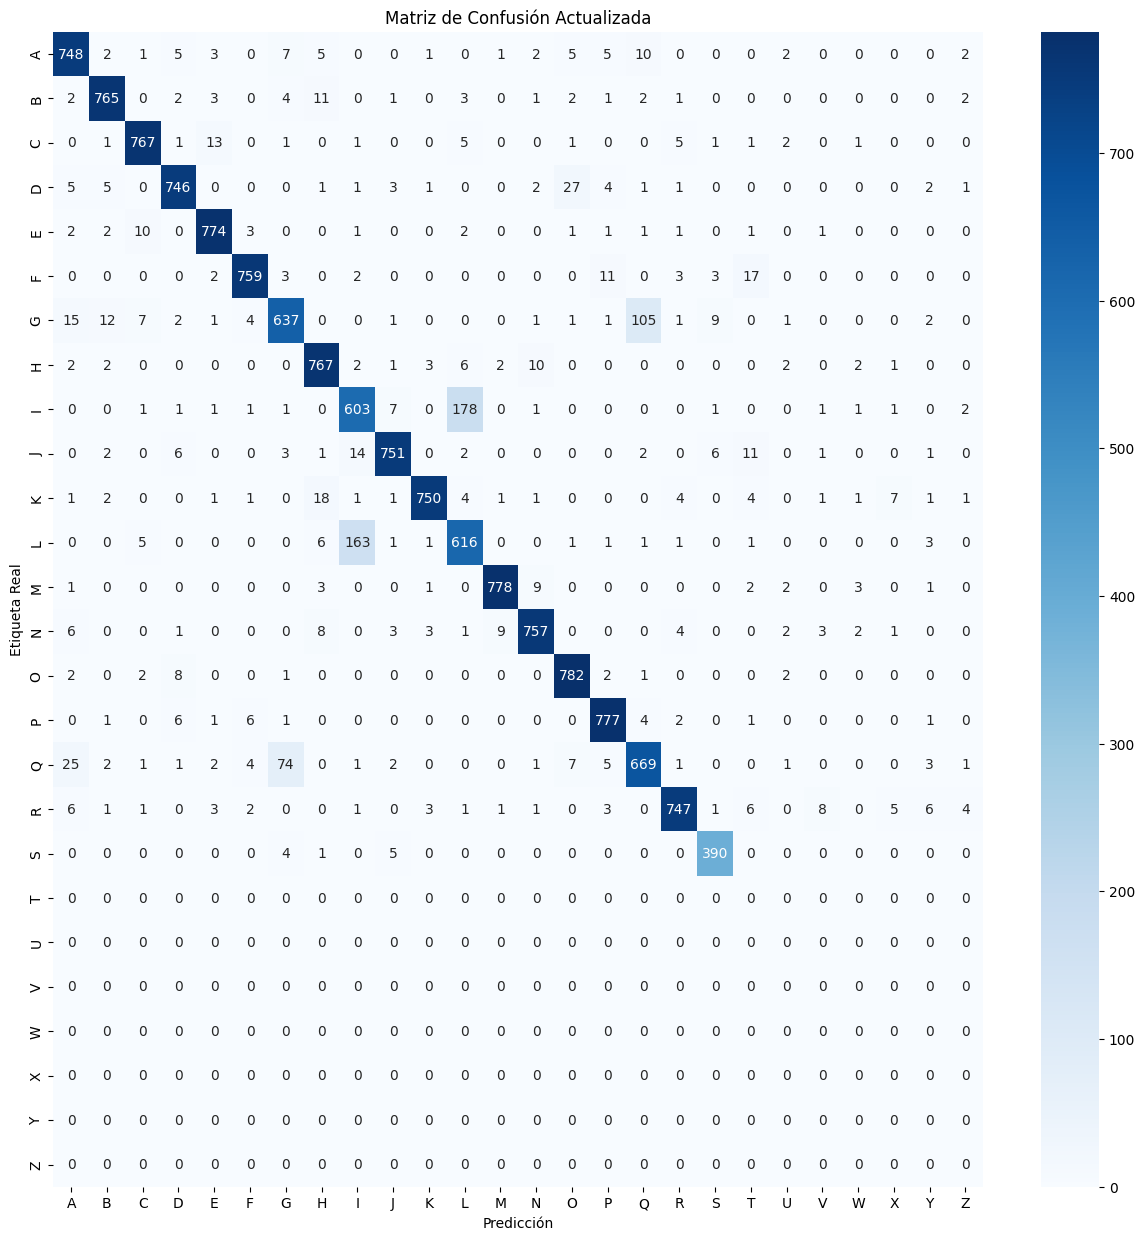


Ejemplos de predicciones:
Verdadera: L, Predicha: L
Verdadera: G, Predicha: G
Verdadera: S, Predicha: S
Verdadera: H, Predicha: R
Verdadera: Q, Predicha: Q
Verdadera: O, Predicha: O
Verdadera: F, Predicha: F
Verdadera: R, Predicha: R
Verdadera: Q, Predicha: Q
Verdadera: T, Predicha: T


In [2]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Función para convertir números a letras (ajustada para A-Z)
def num_to_letter(num):
    return chr(num + 65)  # A es 65 en ASCII, y nuestras etiquetas empiezan en 0

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a Z (1 a 26 en el dataset)
train_data = train_data[train_data.iloc[:, 0] <= 26]
test_data = test_data[test_data.iloc[:, 0] <= 26]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos (escalar los valores de píxeles a [0, 1])
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Crear el modelo con varias capas, mayor dropout y regularización L2
model = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),  # Dropout para evitar el sobreajuste
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(26, activation='softmax')  # 26 clases para las letras A-Z
])

# Compilar el modelo con una tasa de aprendizaje baja
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),  # Tasa de aprendizaje más baja
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks: EarlyStopping y ReduceLROnPlateau para ajustar la tasa de aprendizaje y detener el entrenamiento cuando sea necesario
early_stopping = EarlyStopping(patience=15, restore_best_weights=True)  # Detiene el entrenamiento si no hay mejora en 15 épocas
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)  # Reduce la tasa de aprendizaje si no hay mejora en 5 épocas

# Entrenar el modelo con los datos de entrenamiento y validación
history = model.fit(
    X_train, y_train_encoded,
    epochs=150,
    batch_size=256,  # Aumentar el tamaño del batch para mejorar la convergencia
    validation_data=(X_val, y_val_encoded),
    callbacks=[early_stopping, reduce_lr],  # Utilizar los callbacks
    verbose=1  # Mostrar información detallada durante el entrenamiento
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación detallado
print("\nInforme de clasificación:")
print(classification_report(y_test_encoded, predicted_indices))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test_encoded, predicted_indices)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[chr(i) for i in range(65, 91)],  # Etiquetas en el eje x (letras A-Z)
            yticklabels=[chr(i) for i in range(65, 91)])  # Etiquetas en el eje y (letras A-Z)
plt.title('Matriz de Confusión Actualizada')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test_encoded), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {index_to_letter[y_test_encoded[i]]}, Predicha: {predicted_letters[i]}")


Con OneHotEncoding y categorical_crossentropy

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4786 - loss: 2.8336 - val_accuracy: 0.8023 - val_loss: 1.3743 - learning_rate: 0.0010
Epoch 2/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 23s 25ms/step - accuracy: 0.7493 - loss: 1.4894 - val_accuracy: 0.8452 - val_loss: 1.0362 - learning_rate: 0.0010
Epoch 3/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.7909 - loss: 1.1749 - val_accuracy: 0.8533 - val_loss: 0.8937 - learning_rate: 0.0010
Epoch 4/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8109 - loss: 1.0163 - val_accuracy: 0.8612 - val_loss: 0.8020 - learning_rate: 0.0010
Epoch 5/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8159 - loss: 0.9487 - val_accuracy: 0.8662 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 6/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.8216 - loss: 0.9115 - val_accuracy: 0.8729 - val_loss: 0.7216 - learning_rate: 0.0010
Epoch 7/100
555/555 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


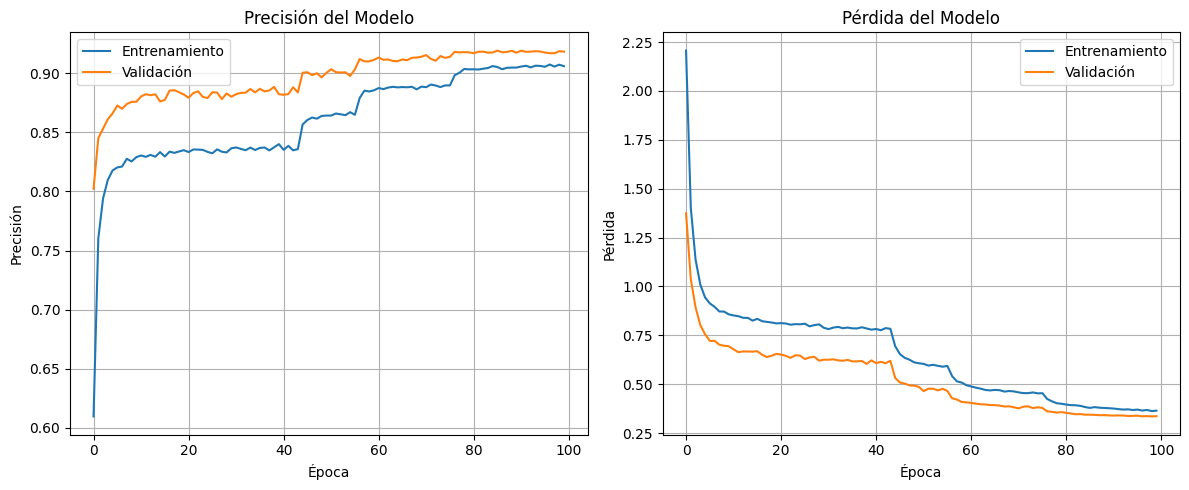

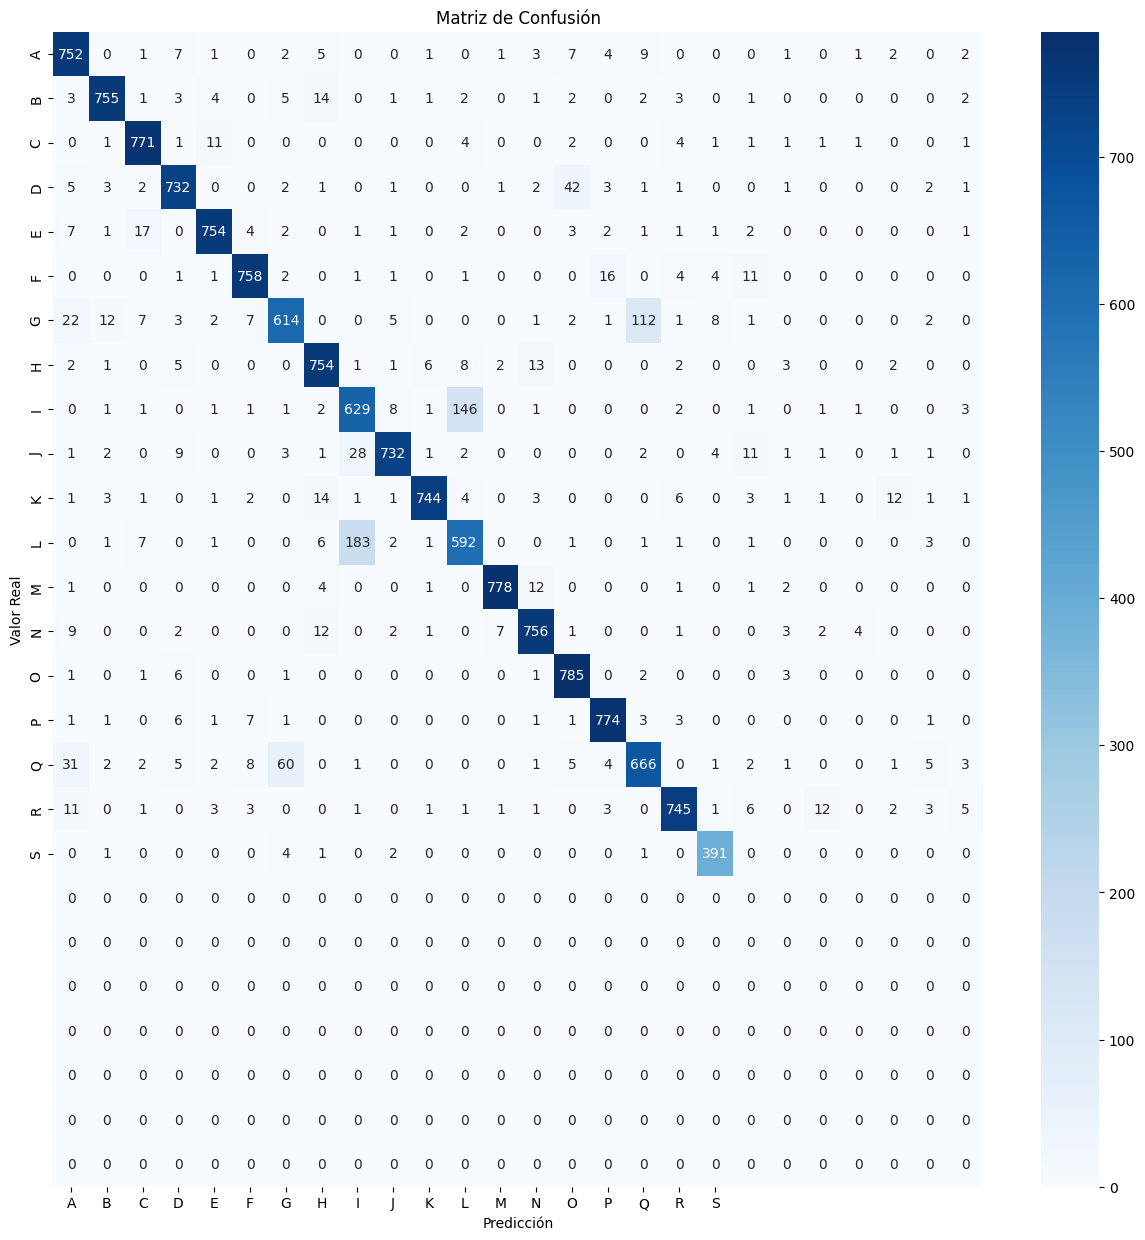


Ejemplos de predicciones:
Verdadera: J, Predicha: J
Verdadera: L, Predicha: L
Verdadera: M, Predicha: M
Verdadera: M, Predicha: M
Verdadera: B, Predicha: E
Verdadera: C, Predicha: C
Verdadera: K, Predicha: K
Verdadera: P, Predicha: P
Verdadera: N, Predicha: N
Verdadera: P, Predicha: P


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Función para convertir números a letras (ajustada para A-Z)
def num_to_letter(num):
    return chr(num + 64)  # A es 65 en ASCII, nuestras etiquetas empiezan en 1

# Cargar los datos
train_data = pd.read_csv('emnist-letters-train.csv')
test_data = pd.read_csv('emnist-letters-test.csv')

# Filtrar solo las letras de A a Z (números de 1 a 26)
train_data = train_data[train_data.iloc[:, 0] <= 26]
test_data = test_data[test_data.iloc[:, 0] <= 26]

# Separar características y etiquetas
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convertir etiquetas numéricas a letras
y_train = np.array([num_to_letter(num) for num in y_train])
y_test = np.array([num_to_letter(num) for num in y_test])

# Crear un mapeo de letras a índices
letter_to_index = {letter: index for index, letter in enumerate(sorted(set(y_train)))}
index_to_letter = {index: letter for letter, index in letter_to_index.items()}

# Convertir letras a índices para el entrenamiento
y_train_encoded = np.array([letter_to_index[letter] for letter in y_train])
y_test_encoded = np.array([letter_to_index[letter] for letter in y_test])

# Convertir etiquetas a One-Hot Encoding
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test_encoded.reshape(-1, 1))

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_val, y_train_onehot, y_val_onehot = train_test_split(X_train, y_train_onehot, test_size=0.2, random_state=42)

# Crear el modelo feedforward
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),  # Aumentar el dropout para reducir el sobreajuste
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(26, activation='softmax')  # 26 clases para A-Z
])

# Compilar el modelo
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Cambiamos la función de pérdida
              metrics=['accuracy'])

# Callbacks para mejorar el entrenamiento
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model.fit(
    X_train, y_train_onehot,
    epochs=100,
    batch_size=128,
    validation_data=(X_val, y_val_onehot),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluar el modelo en el conjunto de validación
val_loss, val_acc = model.evaluate(X_val, y_val_onehot, verbose=0)
print(f'\nPrecisión en el conjunto de validación: {val_acc:.4f}')

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_test, y_test_onehot, verbose=0)
print(f'\nPrecisión en el conjunto de prueba: {test_acc:.4f}')

# Realizar predicciones en el conjunto de prueba
predictions = model.predict(X_test)
predicted_indices = np.argmax(predictions, axis=1)
predicted_letters = np.array([index_to_letter[index] for index in predicted_indices])

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, predicted_letters))

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid()

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Crear y visualizar la matriz de confusión
cm = confusion_matrix(y_test, predicted_letters)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Imprimir algunas predicciones de ejemplo
print("\nEjemplos de predicciones:")
for i in np.random.choice(len(y_test), 10):  # Muestra 10 predicciones aleatorias
    print(f"Verdadera: {y_test[i]}, Predicha: {predicted_letters[i]}")
